# Exercício 10

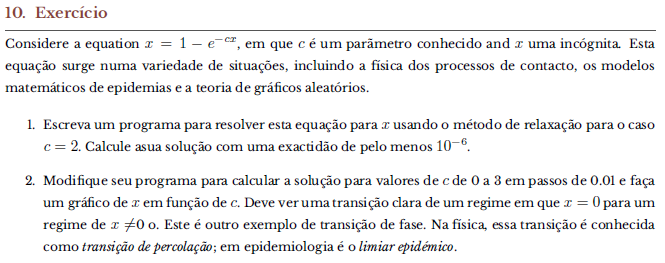

[Página do Notion](https://www.notion.so/guilhermebaos/13-M-todo-da-Relaxa-o-9f1c307a29914ca99cc6fd920bfd14f8?pvs=4).

In [88]:
from typing import Callable
import numpy as np
import matplotlib.pyplot as plt

## Alínea 1

Vamos estudar a convergência do método. Supondo que existe uma solução $x^*$ e que a estimativa inicial é suficientemente próxima da solução o método converge para a solução se:

$$
\begin{align*}
f(x) &= 1 - e^{-cx}
\\\\
\left|\frac{df}{dx}(x^*)\right| < 1 &\hArr |c|e^{-cx^*} < 1 \hArr
\\\\
&\hArr \begin{cases}
e^{-cx^*} < \frac1c &\text{se } c > 0
\\\\
e^{-cx^*} > -\frac1c &\text{se } c < 0
\end{cases}
\\\\
&\hArr \begin{cases}
-cx^* < -\ln(c) &\text{se } c > 0
\\\\
-cx^* > -\ln(-c) &\text{se } c < 0
\end{cases}
\\\\
&\hArr \begin{cases}
x^* > \frac{\ln(c)}{c} &\text{se } c > 0
\\\\
x^* > \frac{\ln(-c)}{c} &\text{se } c < 0
\end{cases}
\end{align*}
$$

Notamos ainda que:
- Para qualquer $c$, $x = 0$ é solução
- Para $c < 0$ a única solução é $x = 0$:
    - Caso $x > 0$ então o lado direito da equação é menor que $0$
    - Caso $x < 0$ então o lado direito da equação é maior que $0$

In [89]:
def relax(func: Callable, x0: float | np.ndarray, eps: float = 1e-6, maxI: int = 1000) -> (float | np.ndarray):
    """
        Resolve a equação `func(x) = x` usando o método da relaxação começando com a estimativa `x0` e parando quando o erro for menor que `eps` fazendo no máximo `maxI` iterações.

        O erro para várias variáveis é medido como sendo a distância entre duas estimativas consecutivas.

        ### Argumentos
        func: Uma função que aceita um array de `N` elementos e devolve um array de `N` elementos.
        x0: Um array de `N` elementos a usar como primeira estimativa.
        eps: Erro máximo permitido pelo método.
        maxI: Número máximo de iterações, se for ultrapassado o método levanta uma exceção.

        ### Retorno
        x: Float ou array de `N` elementos que soluciona a equação.
    """

    # Número de variáveis
    N = 1 if len(np.array(x0).shape) == 0 else len(np.array(x0))

    # Início do algoritmo
    i = 0
    erro = eps + 1

    x1 = func(x0)
    while abs(erro) > eps:

        # Dar um passo
        x2 = func(x1)

        # Estimar o erro
        if N == 1:
            erro = ((x1 - x2)**2) / (2 * x1 - x0 - x2)
        else:
            erro = np.linalg.norm(x2 - x1)
            

        # Próximo passo
        x0 = x1
        x1 = x2

        # Número de iterações
        i += 1
        if i > maxI:
            raise ValueError(f"Não foi possível encontrar a solução com a precisão desejada com menos de maxI = {maxI} iterações!")
    
    return x1

In [90]:
def problema(c: float) -> Callable:
    return lambda x: 1 - np.exp(-c * x)


# Função a resolver
f = problema(2)

# Solução
print(relax(f, 1))

0.7968126311118457


## Alínea 2

Text(0, 0.5, 'Solução da equação $x = 1 - e^{-cx}$')

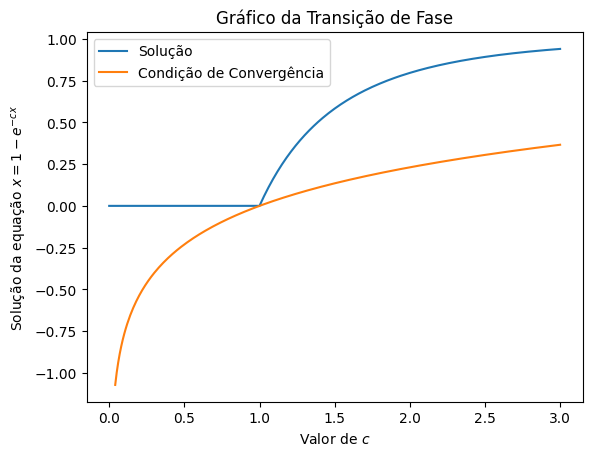

In [91]:
# Parâmetros
start = 0
end = 3
step = 0.01

N = int((end - start) / step) + 1

# Equação para todos os c
xx = []
cc = np.linspace(start, end, N)
for c in cc:

    # São precisas muitas iterações pois para c = 1 a derivada na solução é aproximadamente 1
    xx += [relax(problema(c), 1, eps=1e-4, maxI=100_000)]

# Representar graficamente as soluções
plt.plot(cc, xx, label="Solução")
plt.plot(cc[4:], np.log(cc[4:])/cc[-1], label="Condição de Convergência")
plt.legend()
plt.title("Gráfico da Transição de Fase")
plt.xlabel("Valor de $c$")
plt.ylabel("Solução da equação $x = 1 - e^{-cx}$")

## Refazer com Sobre-Relaxação

In [92]:
def overrelax(func: Callable, x0: float = 1, omega: float = 0.5, eps: float = 1e-6, maxI: int = 1000) -> float:
    """
        Resolve a equação `func(x) = x` usando o método da relaxação com parâmetro `omega` começando com a estimativa `x0` e parando quando o erro for menor que `eps` fazendo no máximo `maxI` iterações.

        O erro para várias variáveis é medido como sendo a distância entre duas estimativas consecutivas.

        ### Argumentos
        func: Uma função que aceita um array de `N` elementos e devolve um array de `N` elementos.
        x0: Um array de `N` elementos a usar como primeira estimativa.
        eps: Erro máximo permitido pelo método.
        maxI: Número máximo de iterações, se for ultrapassado o método levanta uma exceção.

        ### Retorno
        x: Float ou array de `N` elementos que soluciona a equação.
    """

    # Número de variáveis
    N = 1 if len(np.array(x0).shape) == 0 else len(np.array(x0))
    
    # Início do algoritmo
    i = 0
    erro = eps + 1

    x1 = func(x0)
    while abs(erro) > eps:
        
        # Dar um passo
        x2 = (1 + omega) * func(x1) - omega * x1

        # Estimar o erro
        if N == 1:
            erro = (x1 - x2) / (1 - 1/((1 + omega) * (x1 - x2)/(x0 - x1) - omega))
        else:
            erro = np.linalg.norm(x2 - x1)

        # Próximo passo
        x0 = x1
        x1 = x2

        # Número de iterações
        i += 1
        if i > maxI:
            raise ValueError(f"Não foi possível encontrar a solução com a precisão desejada com menos de maxI = {maxI} iterações!")
    
    return x1

Text(0, 0.5, 'Solução da equação $x = 1 - e^{-cx}$')

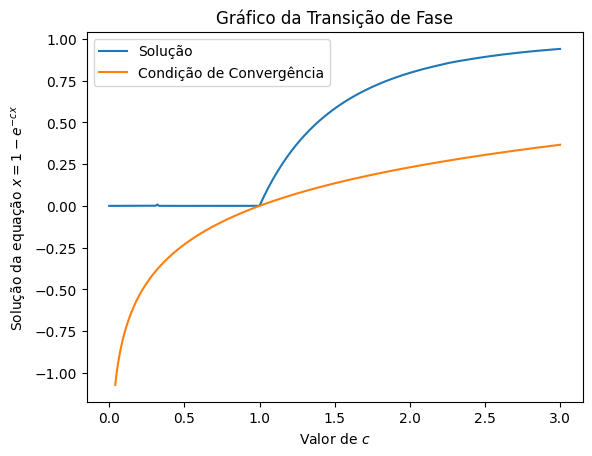

In [93]:
# Parâmetros
start = 0
end = 3
step = 0.01

N = int((end - start) / step) + 1

# Equação para todos os c
xx = []
cc = np.linspace(start, end, N)
for c in cc:

    # São precisas muitas iterações pois para c = 1 a derivada na solução é aproximadamente 1
    xx += [overrelax(problema(c), 1, omega=0.2, eps=1e-4, maxI=100_000)]

# Representar graficamente as soluções
plt.plot(cc, xx, label="Solução")
plt.plot(cc[4:], np.log(cc[4:])/cc[-1], label="Condição de Convergência")
plt.legend()
plt.title("Gráfico da Transição de Fase")
plt.xlabel("Valor de $c$")
plt.ylabel("Solução da equação $x = 1 - e^{-cx}$")